## Observations and Insights 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
mouse_metadata_df.head()

# Combine the data into a single dataset

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [32]:
# Check the number of mice.
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [33]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

study_results_df[study_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep= False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [34]:
# Drop any duplicate rows
study_results_df = study_results_df[~study_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep= False)]


In [35]:
# Recheck the number of mice
study_results_df["Mouse ID"].nunique()

249

In [36]:
mouse_df = pd.merge(mouse_metadata_df,study_results_df, how="inner", on="Mouse ID")
mouse_df = mouse_df.dropna()
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
mouse_group = mouse_df.groupby("Drug Regimen")
mouse_mean = mouse_group["Tumor Volume (mm3)"].mean()
mouse_med = mouse_group["Tumor Volume (mm3)"].median()
mouse_var = mouse_group["Tumor Volume (mm3)"].var()
mouse_std = mouse_group["Tumor Volume (mm3)"].std()
mouse_sem = mouse_group["Tumor Volume (mm3)"].sem()
summary = pd.DataFrame({"Tumor Volume Mean":mouse_mean,
                       "Tumor Volume Median":mouse_med,
                       "Tumor Volume Variance":mouse_var,
                       "Tumor Volume Std Dev":mouse_std,
                       "Tumor Volume SEM":mouse_sem})
summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

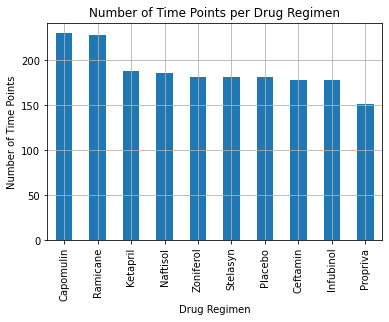

In [40]:
 # Generate a bar plot showing the total number of datapoints for each drug regimen using pandas
  # of timepoints per mouse, not all mice lived til the end of the study)
# There should be a single bar per regimen
mouse_time = mouse_df["Drug Regimen"].value_counts()
time_bar = mouse_time.plot(kind="bar")
time_bar.set_xlabel("Drug Regimen")
time_bar.set_ylabel("Number of Time Points")
time_bar.set_title("Number of Time Points per Drug Regimen")
time_bar.grid()

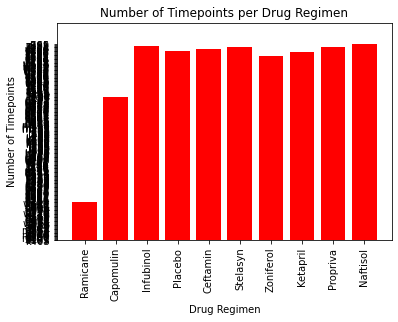

In [51]:
# Generate identical bar plot using pyplot instead of pandas.
plt.bar(mouse_df["Drug Regimen"], mouse_df["Mouse ID"], color='r', align="center")
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints per Drug Regimen")
plt.xticks(rotation=90)
plt.ylim(0, 275)
plt.show()


<AxesSubplot:title={'center':'Distribution by Sex'}, ylabel='Sex'>

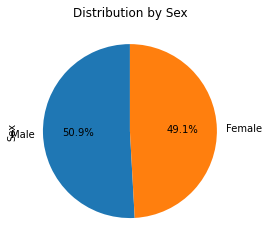

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = mouse_df['Sex'].value_counts()
gender_pie = gender_data.plot.pie(autopct="%1.1f%%", startangle=90, title='Study Mice Gender Distribution')

gender_pie

([<matplotlib.patches.Wedge at 0x7ff3e6351a00>,
 [Text(-1.099583225836728, -0.030277540496140364, ''),
  Text(1.099583225836728, 0.030277540496140714, '')],
 [Text(-0.5997726686382152, -0.016515022088803833, '50.9%'),
  Text(0.5997726686382152, 0.016515022088804024, '49.1%')])

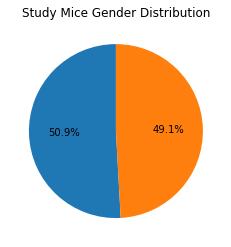

In [59]:
# Generate identical pie plot using pyplot
gender_py = plt.pie(gender_data,autopct="%1.1f%%", startangle=90)
plt.title("Study Mice Gender Distribution")
gender_py

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights